In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime

In [2]:
avgi_df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/avgi_full_articles_tempi_2023_1-7_3_2023.csv')

In [3]:
avgi_df.head(5)

site                                                url    section  \
0  avgi.gr  https://www.avgi.gr//politiki/441613_metathesi...   ΠΟΛΙΤΙΚΗ   
1  avgi.gr  https://www.avgi.gr//koinonia/441575_dekades-k...   ΚΟΙΝΩΝΙΑ   
2  avgi.gr  https://www.avgi.gr//koinonia/441566_pos-apofe...   ΚΟΙΝΩΝΙΑ   
3  avgi.gr  https://www.avgi.gr//koinonia/441565_i-elas-kl...   ΚΟΙΝΩΝΙΑ   
4  avgi.gr  https://www.avgi.gr//koinonia/441564_apergiako...   ΚΟΙΝΩΝΙΑ   

                                               title            date  \
0   Μαξίμου / Μετάθεση των εκλογών λόγω της λαϊκή...  08.03.23 07:30   
1   Τέμπη / Δεκάδες καταλήψεις σε πανεπιστήμια - ...  08.03.23 00:02   
2   Σέρρες / Πώς αποφεύχθηκε τελευταία στιγμή σύγ...  07.03.23 22:28   
3   Απεργία / Η ΕΛΑΣ κλείνει τους πιο κεντρικούς ...  07.03.23 21:56   
4   Τέμπη / Απεργιακό «ποτάμι» σε όλη τη χώρα την...  07.03.23 21:35   

               author                                          full_text  
0  Κώστας Σαββόπουλος  Την 21η Μαΐου δείχνει πλέον η κυβερνητική πυξί...  
1       Αυγή Newsroom  Το κίνημα που διεκδικεί το δικαίωμα στην ζωή κ...  
2       Αυγή Newsroom  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...  
3       Αυγή Newsroom  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...  
4       Αυγή Newsroom  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...

In [6]:
avgi_df.shape

(270, 7)

In [5]:
avgi_df.dropna()

site                                                url    section  \
0    avgi.gr  https://www.avgi.gr//politiki/441613_metathesi...   ΠΟΛΙΤΙΚΗ   
1    avgi.gr  https://www.avgi.gr//koinonia/441575_dekades-k...   ΚΟΙΝΩΝΙΑ   
2    avgi.gr  https://www.avgi.gr//koinonia/441566_pos-apofe...   ΚΟΙΝΩΝΙΑ   
3    avgi.gr  https://www.avgi.gr//koinonia/441565_i-elas-kl...   ΚΟΙΝΩΝΙΑ   
4    avgi.gr  https://www.avgi.gr//koinonia/441564_apergiako...   ΚΟΙΝΩΝΙΑ   
..       ...                                                ...        ...   
265  avgi.gr  https://www.avgi.gr//koinonia/440913_i-politik...   ΚΟΙΝΩΝΙΑ   
266  avgi.gr  https://www.avgi.gr//koinonia/440912_koybenta-...   ΚΟΙΝΩΝΙΑ   
267  avgi.gr  https://www.avgi.gr//politiki/440910_adianoito...   ΠΟΛΙΤΙΚΗ   
268  avgi.gr  https://www.avgi.gr//koinonia/440909_tragiki-i...   ΚΟΙΝΩΝΙΑ   
269  avgi.gr  https://www.avgi.gr//koinonia/440908_den-leito...   ΚΟΙΝΩΝΙΑ   

                                                 title            date  \
0     Μαξίμου / Μετάθεση των εκλογών λόγω της λαϊκή...  08.03.23 07:30   
1     Τέμπη / Δεκάδες καταλήψεις σε πανεπιστήμια - ...  08.03.23 00:02   
2     Σέρρες / Πώς αποφεύχθηκε τελευταία στιγμή σύγ...  07.03.23 22:28   
3     Απεργία / Η ΕΛΑΣ κλείνει τους πιο κεντρικούς ...  07.03.23 21:56   
4     Τέμπη / Απεργιακό «ποτάμι» σε όλη τη χώρα την...  07.03.23 21:35   
..                                                 ...             ...   
265   Εργαζόμενοι ΣΤΑΣΥ για Τέμπη / Η πολιτική ηγεσ...  01.03.23 09:11   
266   Σύγκρουση τρένων στα Τέμπη / Κουβέντα για τα ...  01.03.23 08:49   
267   Αλέξης Τσίπρας / «Αδιανόητο αυτό που συνέβη» ...  01.03.23 08:32   
268   Σύγκρουση τρένων στα Τέμπη / «Τραγική η εικόν...  01.03.23 08:18   
269   Πρόεδρος μηχανοδηγών ΟΣΕ / Δεν λειτουργεί καν...  01.03.23 08:14   

                 author                                          full_text  
0    Κώστας Σαββόπουλος  Την 21η Μαΐου δείχνει πλέον η κυβερνητική πυξί...  
1         Αυγή Newsroom  Το κίνημα που διεκδικεί το δικαίωμα στην ζωή κ...  
2         Αυγή Newsroom  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...  
3         Αυγή Newsroom  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...  
4         Αυγή Newsroom  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...  
..                  ...                                                ...  
265       Αυγή Newsroom  «Σήμερα θρηνούμε τους συμπολίτες μας που χάθηκ...  
266       Αυγή Newsroom  Ούτε μία λέξη για το τι προκάλεσε την ανείπωτη...  
267       Αυγή Newsroom  Συγκλονισμένος από την ανείπωτη τραγωδία στα Τ...  
268       Αυγή Newsroom  Ο δήμαρχος Λάρισας Απόστολος Καλογιάννης μίλησ...  
269       Αυγή Newsroom  Πολύ σοβαρές καταγγελίες για την κατάσταση διά...  

[269 rows x 7 columns]

In [7]:
avgi_df['full_text'].loc[0]

'Την 21η Μαΐου δείχνει πλέον η κυβερνητική πυξίδα για την προσφυγή στη λαϊκή ετυμηγορία. Οι συνεργάτες του Κυριάκου Μητσοτάκη, μετά το βαρύ κοινωνικό κλίμα που έχει προκληθεί για την κυβέρνηση λόγω της τραγωδίας στα Τέμπη, θεωρούν επιβεβλημένη την αναθεώρηση του αρχικού εκλογικού χρονοδιαγράμματος. Υπό αυτό το πρίσμα, οι δεύτερες κάλπες, αν χρειαστούν, θα στηθούν στις 2 Ιουλίου, χωρίς να επηρεαστεί η διαδικασία των Πανελλαδικών εξετάσεων. Στην κυβέρνηση ουσιαστικά επιδιώκουν μόνο συμμαχία με τον χρόνο, ελπίζοντας στην υποχώρηση του συλλογικού τραύματος και της γενικευμένης οργής μέχρι την ώρα της κρίσης. Οι πρώτες σφυγμομετρήσεις που φτάνουν στο Μέγαρο Μαξίμου καθρεφτίζουν τη συλλογική αποδοκιμασία για τους κυβερνητικούς χειρισμούς και καταρρίπτουν τις γαλάζιες γραμμές άμυνας που θεμελιώθηκαν στο «ανθρώπινο λάθος» και στην «κούφια» πρωθυπουργική συγγνώμη. Καταλύτη για την οριστικοποίηση του κυβερνητικού σχεδιασμού θα αποτελέσουν και οι αντιδράσεις στους δρόμους. Πηγές που βρίσκονται κο

In [8]:
avgi_df.loc[0, 'date']

'08.03.23 07:30'

In [9]:
avgi_df['date'] = pd.to_datetime(avgi_df['date'], format='%d.%m.%y %H:%M')

In [10]:
avgi_df.dtypes

site                 object
url                  object
section              object
title                object
date         datetime64[ns]
author               object
full_text            object
dtype: object

In [137]:
avgi_df1= avgi_df.copy()

In [ ]:
avgi_df1['year'] = pd.DatetimeIndex(avgi_df1['date']).year
avgi_df1['month'] = pd.DatetimeIndex(avgi_df1['date']).month
avgi_df1['day'] = pd.DatetimeIndex(avgi_df1['date']).day
avgi_df1['hour'] = pd.DatetimeIndex(avgi_df1['date']).hour

avgi_df1.head()

In [ ]:
avgi_df1 = avgi_df1[~(avgi_df1['day'] == 8)].reset_index(drop=True)
avgi_df1.head()

In [11]:
short_avgi= avgi_df[['date','full_text']]

In [12]:
short_avgi.head()

date                                          full_text
0 2023-03-08 07:30:00  Την 21η Μαΐου δείχνει πλέον η κυβερνητική πυξί...
1 2023-03-08 00:02:00  Το κίνημα που διεκδικεί το δικαίωμα στην ζωή κ...
2 2023-03-07 22:28:00  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...
3 2023-03-07 21:56:00  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...
4 2023-03-07 21:35:00  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...

In [13]:
short_avgi['year'] = pd.DatetimeIndex(short_avgi['date']).year
short_avgi['month'] = pd.DatetimeIndex(short_avgi['date']).month
short_avgi['day'] = pd.DatetimeIndex(short_avgi['date']).day
short_avgi['hour'] = pd.DatetimeIndex(short_avgi['date']).hour

short_avgi.head()

<ipython-input-13-286c9835dd7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_avgi['year'] = pd.DatetimeIndex(short_avgi['date']).year
<ipython-input-13-286c9835dd7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_avgi['month'] = pd.DatetimeIndex(short_avgi['date']).month
<ipython-input-13-286c9835dd7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

date                                          full_text  \
0 2023-03-08 07:30:00  Την 21η Μαΐου δείχνει πλέον η κυβερνητική πυξί...   
1 2023-03-08 00:02:00  Το κίνημα που διεκδικεί το δικαίωμα στην ζωή κ...   
2 2023-03-07 22:28:00  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...   
3 2023-03-07 21:56:00  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...   
4 2023-03-07 21:35:00  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...   

   year  month  day  hour  
0  2023      3    8     7  
1  2023      3    8     0  
2  2023      3    7    22  
3  2023      3    7    21  
4  2023      3    7    21

In [14]:
short_avgi = short_avgi[~(short_avgi['day'] == 8)].reset_index(drop=True)
short_avgi.head()

date                                          full_text  \
0 2023-03-07 22:28:00  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...   
1 2023-03-07 21:56:00  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...   
2 2023-03-07 21:35:00  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...   
3 2023-03-07 21:25:00  Σιωπηρή διαμαρτυρία για το σιδηροδρομικό δυστύ...   
4 2023-03-07 21:18:00  Με μία πολύ αιχμηρή ανακοίνωση «απαντάει» το Δ...   

   year  month  day  hour  
0  2023      3    7    22  
1  2023      3    7    21  
2  2023      3    7    21  
3  2023      3    7    21  
4  2023      3    7    21

In [15]:
short_avgi['full_text'] = short_avgi['full_text'].str.replace("twitter", "")
short_avgi['full_text'] = short_avgi['full_text'].str.replace("com", "")
short_avgi['full_text'] = short_avgi['full_text'].str.replace("pic", "")

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Avgi.gr| Άρθρα ανά ώρα')

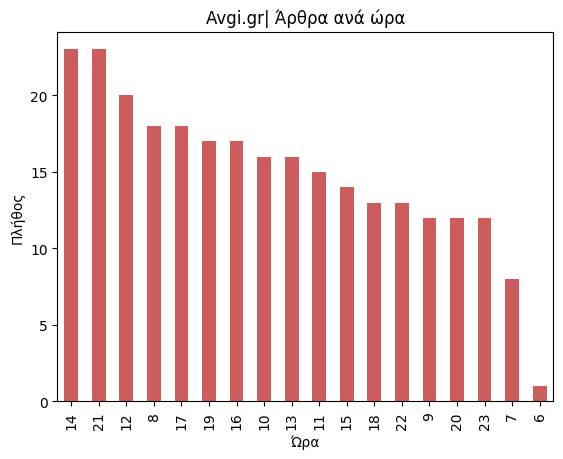

In [24]:
short_avgi['hour'].value_counts().plot(kind='bar', color='indianred')
plt.xlabel('Ώρα')
plt.ylabel('Πλήθος')
plt.title('Avgi.gr| Άρθρα ανά ώρα')

<Axes: >

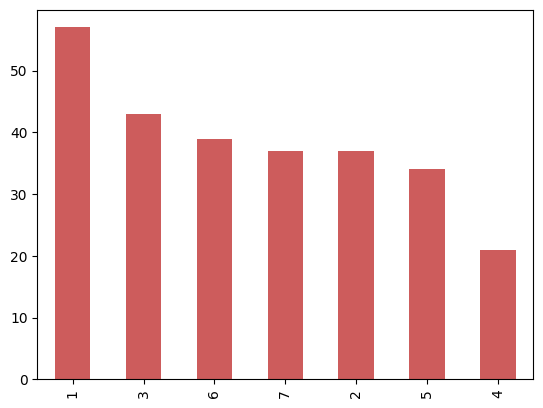

In [25]:
short_avgi['day'].value_counts().plot(kind='bar', color='indianred')

In [26]:
from wordcloud import WordCloud, STOPWORDS

In [27]:
import spacy

In [31]:
pip install spacy

In [33]:
!python -m spacy download el_core_news_sm

2023-07-04 17:21:35.299188: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 43.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [28]:
text = short_avgi['full_text'].str.cat(sep = ' ')

In [29]:
text

'Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέμπη, βγαίνουν στο φως της δημοσιότητας νέα συνταρακτικά στοιχεία, τα οποία δείχνουν τις προειδοποιήσεις ενώσεων και φορέων για τις τεράστιες ελλείψεις που υπάρχουν στο ζήτημα της ασφάλειας στο σιδηροδρομικό δίκτυο. Πιο συγκεκριμένα, ένα τέτοιο τρομακτικό περιστατικό είναι αυτό που είχε συμβεί πριν 10 μήνες, στις 23 Μαΐου του 2022, στον σταθμό των Σερρών, όταν ακινητοποιήθηκε επιβατική αμαξοστοιχία γεμάτη κόσμο και ταυτόχρονα δόθηκε εντολή σε εμπορικό τρένο να διέλθει από το ίδιο σημείο. Η καταγγελία είχε γίνει δημόσια, καθώς σε ανακοίνωσή της η Πανελλήνια Ένωσης Σταθμαρχών ΟΣΕ ανέφερε «Συνταξιούχοι ανοίγουν σταθμούς στις Σέρρες και δίνουν εντολές σε τρένα. Σοβαρός κίνδυνος ατυχήματος στον Ελληνικό Σιδηρόδρομο. Σύμφωνα με την τρομακτική καταγγελία «αντί να ζητηθεί από την ιδιωτικών συμφερόντων ΤΡΑΙΝΟΣΕ να αποσύρει την αμαξοστοιχία της με μηχανή εφεδρείας και με διαδικασίες που προβλέπει ο Γενικός Κανονισμός Κίνησης και Κυκλοφορίας, δόθηκε ε

In [34]:
nlp = spacy.load('el_core_news_sm')

In [35]:
list(nlp.Defaults.stop_words)[0:20]

['μέλει',
 'συχνό',
 'ίδιοι',
 'είθε',
 'εσείς',
 'τελευταίος',
 'πούθε',
 'πρώτα',
 'πόση',
 'οσονδήποτε',
 'όλον',
 'μέσω',
 'μερικούς',
 'οι',
 'πέρι',
 'προχτές',
 'τι',
 'ήσαστε',
 'στα',
 'στη']

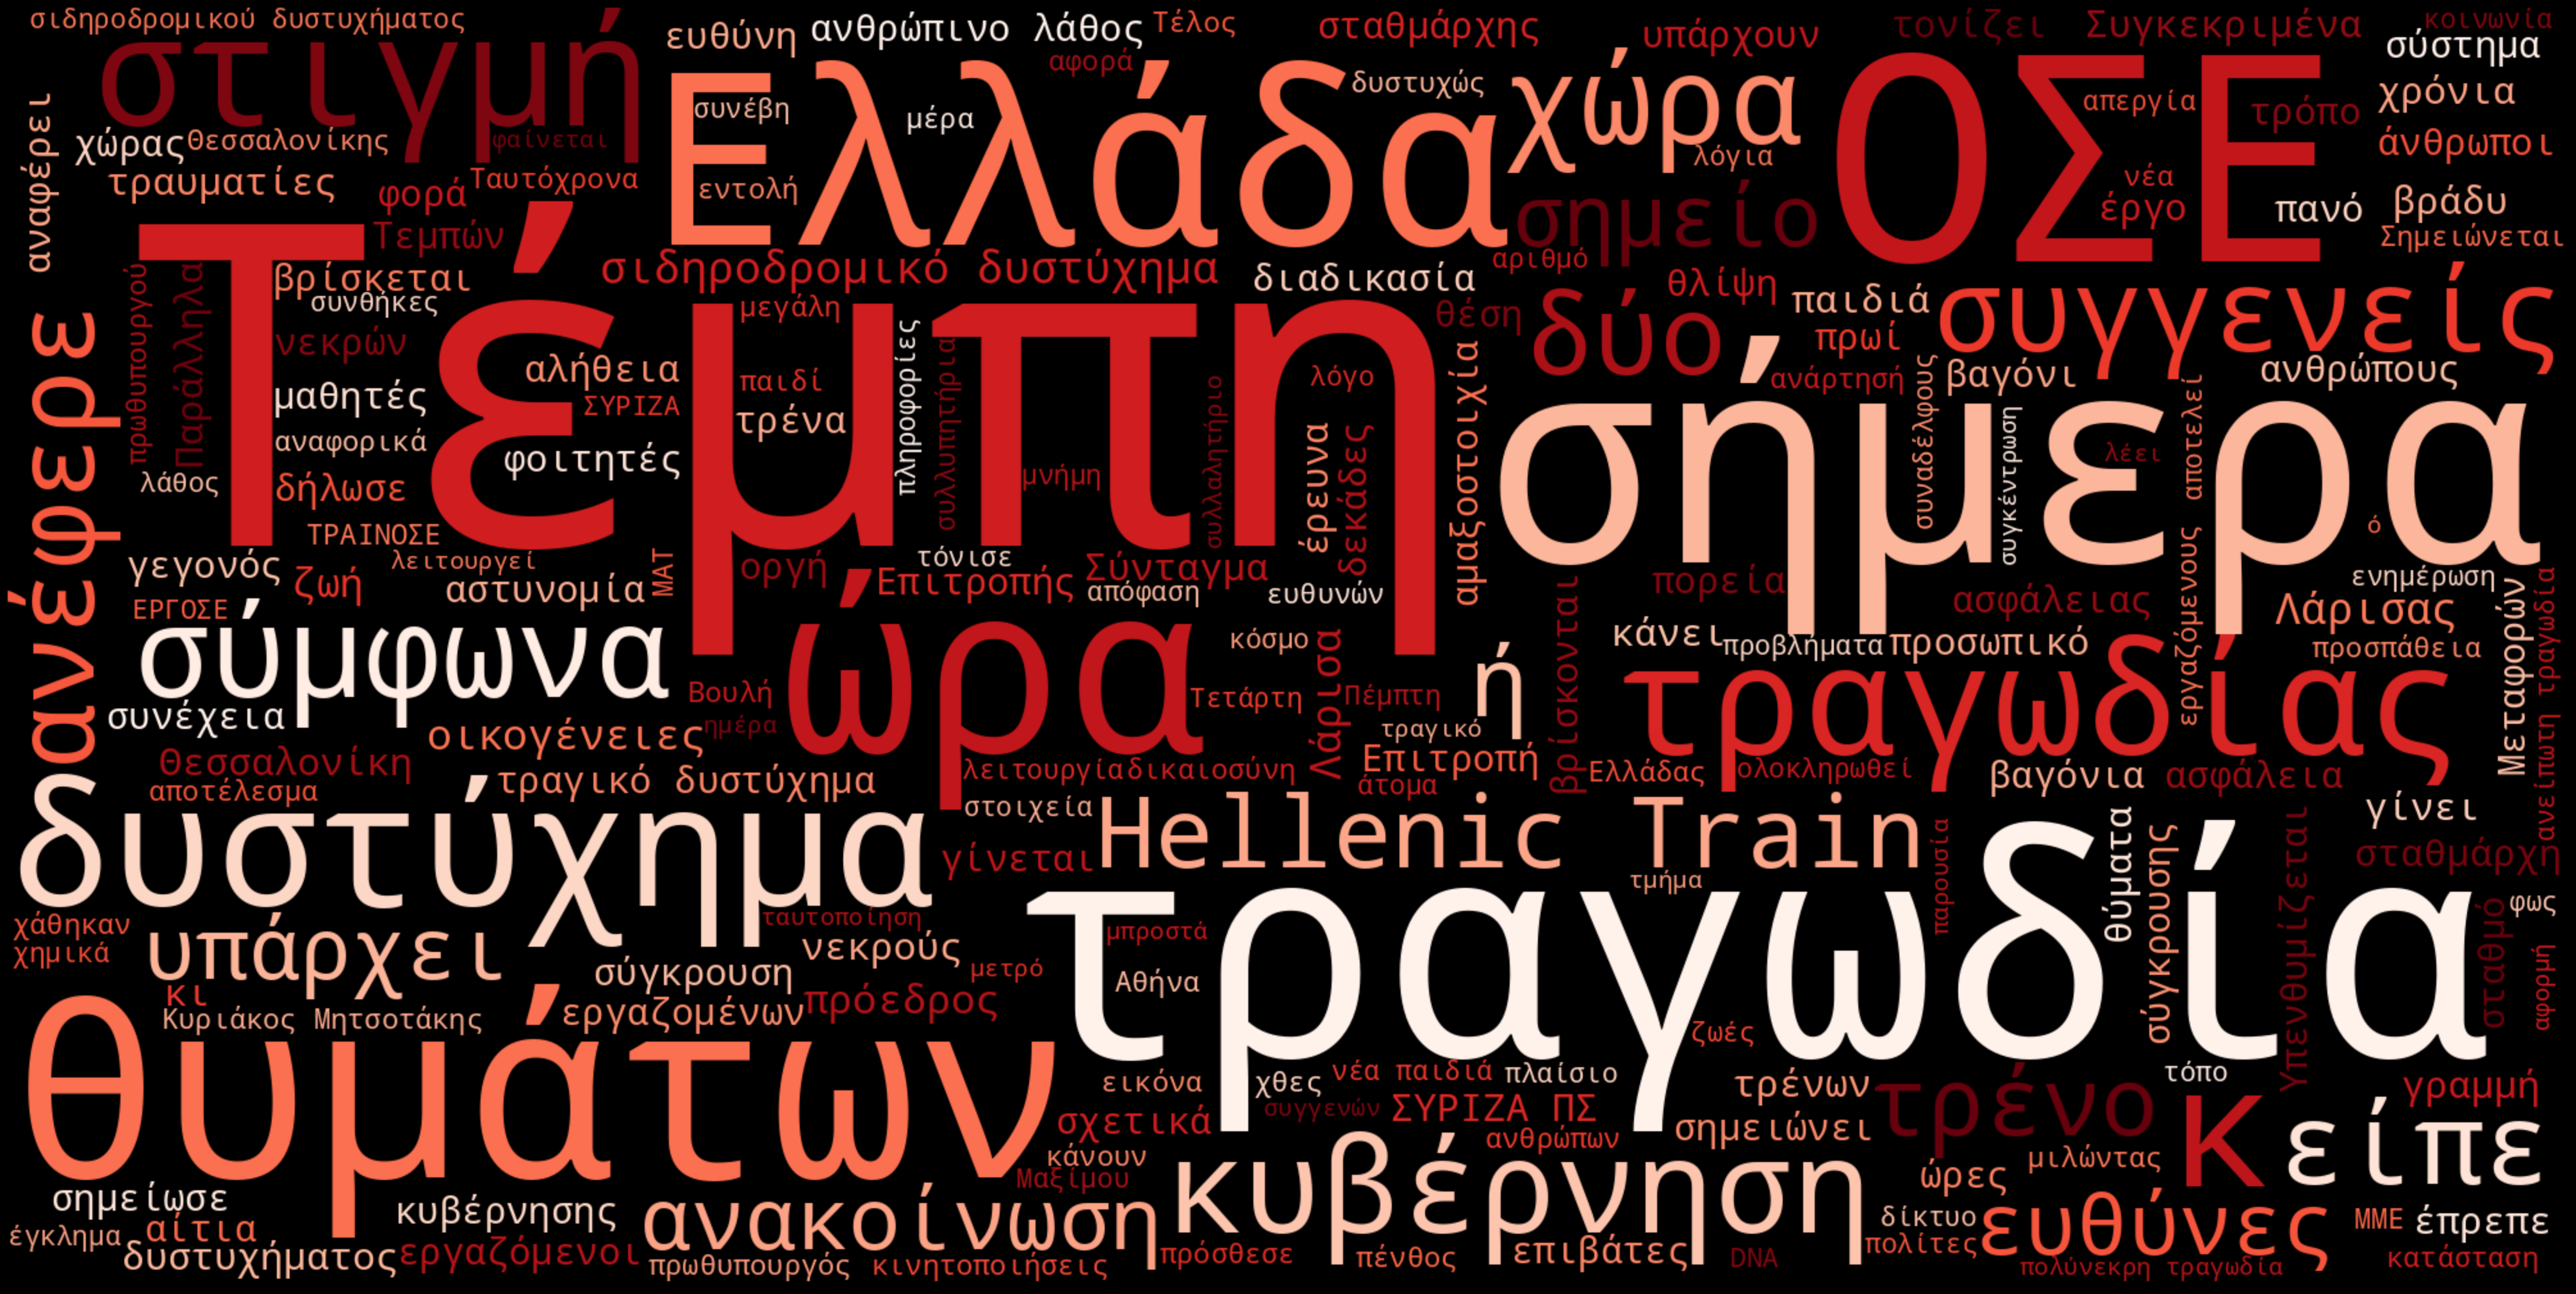

In [39]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap='Reds'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [40]:
doc = nlp(short_avgi['full_text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

In [ ]:
' '.join(token.lemma_ for token in doc)

In [ ]:
text

In [44]:
full_doc = nlp(text)

In [45]:
clear_text = ' '.join(token.lemma_ for token in full_doc)

In [46]:
clear_text[200:400]

' ο ζήτημα ο ασφάλεια σε ο σιδηροδρομικός δίκτυο . πιο συγκεκριμένα , ένας τέτοιος τρομακτικός περιστατικό είμαι αυτός που έχω συμβαίνω πριν 10 μήνας , σε ο 23 μαΐου ο 2022 , σε ο σταθμός ο Σερρών , ότ'

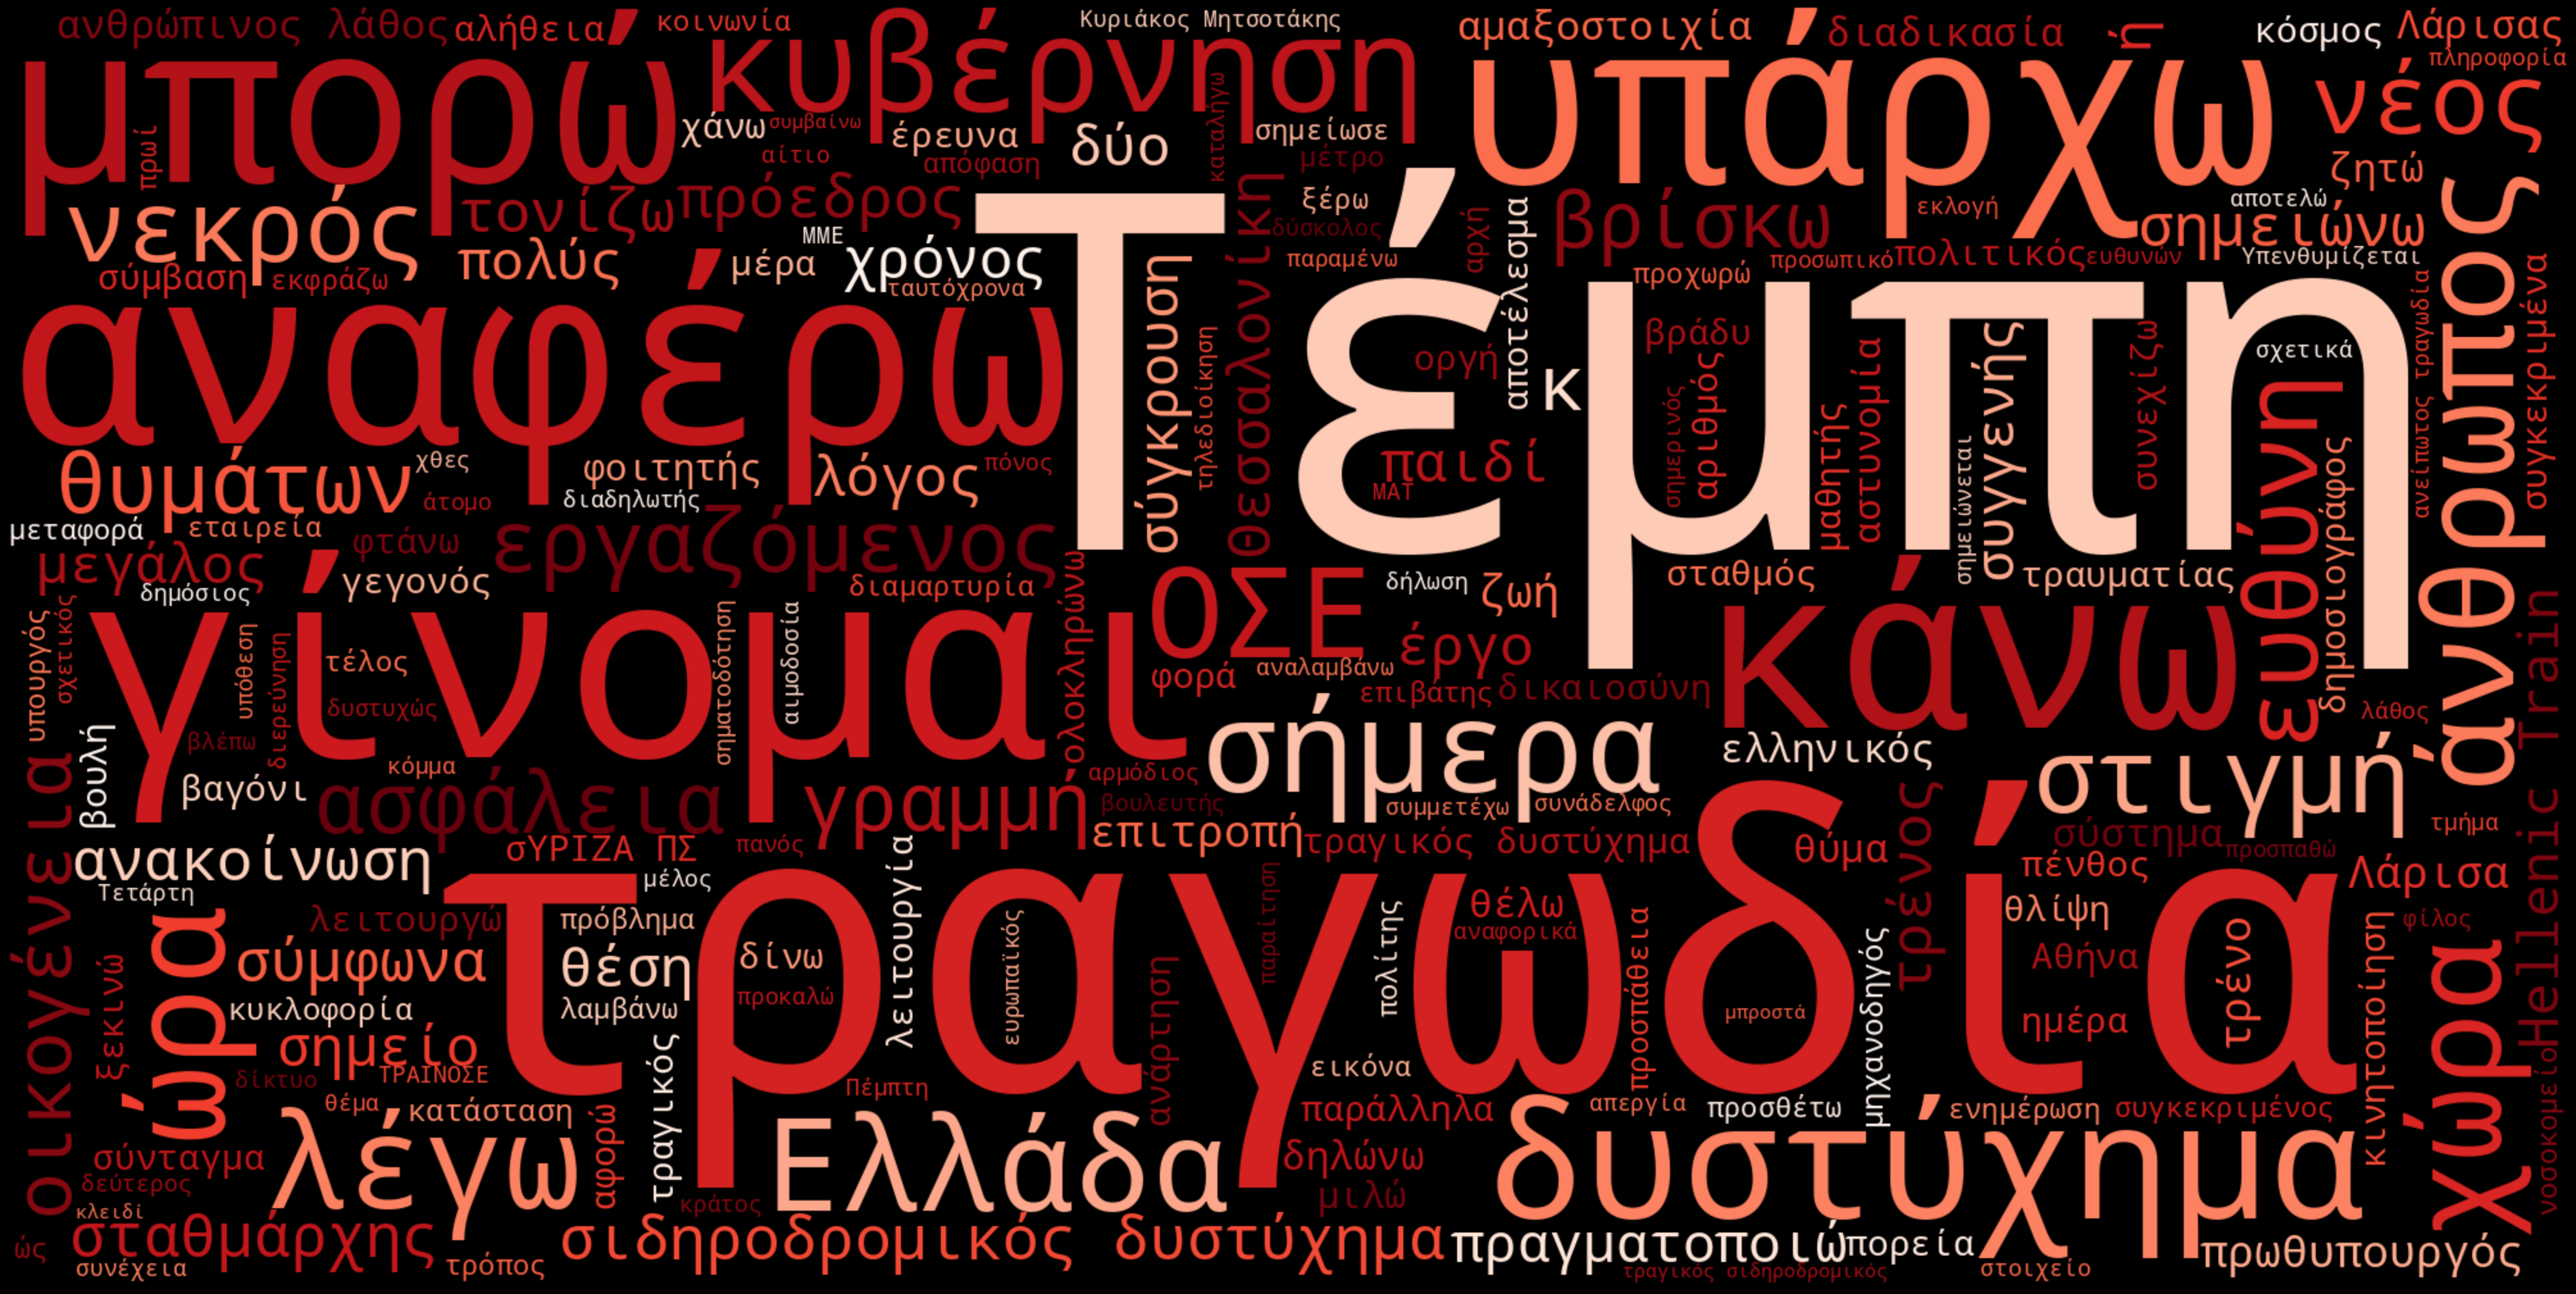

In [47]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black',
    colormap='Reds'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [50]:
short_avgi = short_avgi.dropna(subset=['full_text'])

In [51]:
count_vector = cv.fit_transform(short_avgi['full_text'])

In [52]:
count_vector.shape

(267, 11614)

In [53]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())

results.head()

00  000  00μμ  01  02  03  03110  03111  03310τηλ  04  ...  ύποπτη  \
0   0    0     0   0   0   0      0      0         0   0  ...       0   
1   4    0     0   0   0   0      0      0         0   0  ...       0   
2  12    0     0   1   0   0      0      0         0   0  ...       0   
3   0    0     0   0   0   0      0      0         0   0  ...       0   
4   0    0     0   0   0   0      0      0         0   0  ...       0   

   ύστατος  ύστερα  ύφος  ύψη  ύψος  ώρα  ώρες  ώς  ώστε  
0        0       0     0    0     0    0     0   0     0  
1        0       0     0    0     0    0     0   0     0  
2        0       0     0    0     0    0     0   0     1  
3        0       0     0    0     0    1     0   0     0  
4        0       0     0    0     0    0     0   0     0  

[5 rows x 11614 columns]

In [54]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words)

In [55]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20)
count_vector = cv.fit_transform(short_avgi['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

δυστυχήματος  δυστύχημα  δύο  ελλάδα  ευθύνες  θυμάτων  κυβέρνηση  λάρισας  \
0             0          1    0       0        0        0          0        0   
1             0          1    0       0        0        0          0        0   
2             1          1    1       0        3        0          0        0   
3             0          2    0       0        0        1          0        2   
4             2          1    0       0        0        0          0        0   

   μητσοτάκη  οσε  παιδιά  σήμερα  σιδηροδρομικό  στιγμή  συριζα  τέμπη  \
0          0    7       0       0              2       0       0      1   
1          0    0       0       0              1       0       0      1   
2          0    0       0       0              1       1       1      2   
3          0    0       0       1              1       1       0      1   
4          0    0       0       0              0       2       0      3   

   τραγικό  τραγωδία  τραγωδίας  ώρα  
0        0         1          0    0  
1        0         0          0    0  
2        0         2          0    0  
3        0         0          0    1  
4        0         0          0    0

In [56]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, token_pattern = '\\bκυβ[α-ωά-ώ]*\\b')
count_vector = cv.fit_transform(short_avgi['full_text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results.head()

κυβέρνησή  κυβέρνησής  κυβέρνησαν  κυβέρνηση  κυβέρνησης  κυβερνήσεις  \
0          0           0           0          0           0            0   
1          0           0           0          0           0            0   
2          0           0           0          0           1            0   
3          0           0           0          0           0            0   
4          0           0           0          0           0            0   

   κυβερνήσεων  κυβερνήσεως  κυβερνητικά  κυβερνητικές  κυβερνητική  \
0            0            0            0             0            0   
1            0            0            0             0            0   
2            0            0            0             0            0   
3            0            0            0             0            0   
4            0            0            0             0            0   

   κυβερνητικής  κυβερνητικού  κυβερνητικούς  κυβερνητικό  κυβερνητικός  \
0             0             0              0            0             0   
1             0             0              0            0             0   
2             0             0              0            0             0   
3             0             0              0            0             0   
4             0             0              0            0             0   

   κυβερνητικών  
0             0  
1             0  
2             0  
3             0  
4             0

In [57]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(2, 2))
count_vector = cv.fit_transform(short_avgi['full_text'])
results1 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results1.head()

hellenic train  αθήνα θεσσαλονίκη  ανείπωτη τραγωδία  ανθρώπινο λάθος  \
0               0                  0                  0                0   
1               0                  0                  0                0   
2               0                  0                  0                0   
3               0                  0                  0                0   
4               0                  0                  0                0   

   δυστυχήματος τέμπη  δυστύχημα τέμπη  κυριάκος μητσοτάκης  νέα παιδιά  \
0                   0                0                    0           0   
1                   0                1                    0           0   
2                   0                1                    0           0   
3                   0                1                    0           0   
4                   2                1                    0           0   

   οικογένειες θυμάτων  πολύνεκρη τραγωδία  σιδηροδρομικού δυστυχήματος  \
0                    0                   1                            0   
1                    0                   0                            0   
2                    0                   0                            1   
3                    1                   0                            0   
4                    0                   0                            0   

   σιδηροδρομικό δίκτυο  σιδηροδρομικό δυστύχημα  συριζα πς  σύγκρουση τρένων  \
0                     1                        0          0                 2   
1                     0                        1          0                 0   
2                     0                        1          0                 0   
3                     0                        1          0                 0   
4                     0                        0          0                 0   

   τρένων τέμπη  τραγικό δυστύχημα  τραγωδία τέμπη  τραγωδίας τέμπη  \
0             0                  0               1                0   
1             0                  0               0                0   
2             0                  0               0                0   
3             0                  0               0                0   
4             0                  0               0                0   

   υποδομών μεταφορών  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0

In [58]:
results1.sum(axis =0).sort_values(ascending = False)

τραγωδία τέμπη                 115
δυστύχημα τέμπη                 94
hellenic train                  67
σιδηροδρομικό δυστύχημα         64
συριζα πς                       51
ανθρώπινο λάθος                 45
τραγικό δυστύχημα               44
οικογένειες θυμάτων             35
κυριάκος μητσοτάκης             32
τραγωδίας τέμπη                 31
υποδομών μεταφορών              30
σιδηροδρομικού δυστυχήματος     27
αθήνα θεσσαλονίκη               26
τρένων τέμπη                    26
νέα παιδιά                      26
ανείπωτη τραγωδία               25
δυστυχήματος τέμπη              24
πολύνεκρη τραγωδία              23
σιδηροδρομικό δίκτυο            21
σύγκρουση τρένων                20
dtype: int64

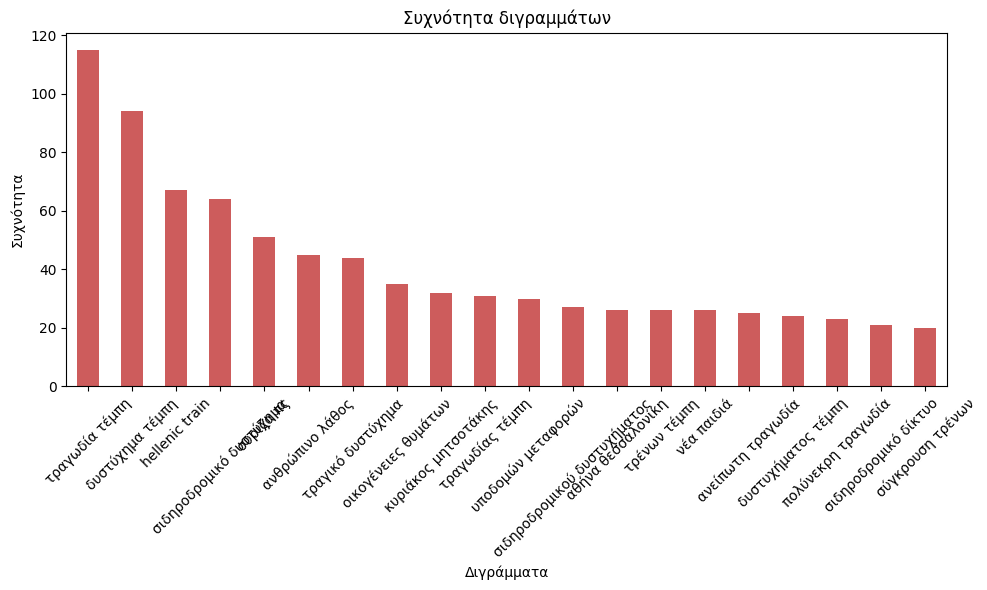

In [60]:
word_freq1 = results1.sum(axis=0).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
word_freq1.plot(kind='bar', color='indianred')
plt.title('Συχνότητα διγραμμάτων')
plt.xlabel('Διγράμματα')
plt.ylabel('Συχνότητα')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(3, 3))
count_vector = cv.fit_transform(short_avgi['full_text'])
results3 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results3.head()

ανείπωτη τραγωδία τέμπη  εισαγγελέα αρείου πάγου  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   πανελλήνια ένωση προσωπικού  πολύνεκρη τραγωδία τέμπη  \
0                            0                         1   
1                            0                         0   
2                            2                         0   
3                            0                         0   
4                            0                         0   

   πολύνεκρο δυστύχημα τέμπη  πολύνεκρο σιδηροδρομικό δυστύχημα  \
0                          0                                  0   
1                          0                                  1   
2                          0                                  1   
3                          0                                  0   
4                          1                                  0   

   προσωπικού τραινοσε πανελλήνια  σιδηροδρομική τραγωδία τέμπη  \
0                               0                             0   
1                               0                             0   
2                               2                             0   
3                               0                             0   
4                               0                             0   

   σιδηροδρομικού δυστυχήματος τέμπη  σιδηροδρομικό δυστύχημα τέμπη  \
0                                  0                              0   
1                                  0                              1   
2                                  0                              1   
3                                  0                              1   
4                                  0                              0   

   συλλυπητήρια οικογένειες θυμάτων  συριζα προοδευτική συμμαχία  \
0                                 0                            0   
1                                 0                            0   
2                                 0                            1   
3                                 0                            0   
4                                 0                            0   

   σύγκρουση τρένων τέμπη  τραγικού σιδηροδρομικού δυστυχήματος  \
0                       0                                     0   
1                       0                                     0   
2                       0                                     1   
3                       0                                     0   
4                       0                                     0   

   τραγικό ανθρώπινο λάθος  τραγικό δυστύχημα τέμπη  \
0                        0                        0   
1                        0                        0   
2                        0                        0   
3                        0                        0   
4                        0                        0   

   τραγικό σιδηροδρομικό δυστύχημα  τραινοσε πανελλήνια ένωση  \
0                                0                          0   
1                                0                          0   
2                                0                          2   
3                                0                          0   
4                                0                          0   

   τύπου συριζα πς  υπουργός υποδομών μεταφορών  
0                0                            0  
1                0                            0  
2                0                            0  
3                0                            0  
4                0                            0

In [62]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20, ngram_range=(4, 4))
count_vector = cv.fit_transform(short_avgi['full_text'])
results4 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results4.head()

hellenic train λεωφόρο συγγρού  δεκάδες τραυματίες σύγκρουση επιβατικής  \
0                               0                                        0   
1                               0                                        0   
2                               0                                        0   
3                               0                                        0   
4                               0                                        0   

   εκπρόσωπος τύπου συριζα πς  επιβεβαιωμένους νεκρούς δεκάδες τραυματίες  \
0                           0                                           0   
1                           0                                           0   
2                           0                                           0   
3                           0                                           0   
4                           0                                           0   

   εργαζομένων κίνησης στασυ αε  εργαζομένων προσωπικού τραινοσε πανελλήνια  \
0                             0                                           0   
1                             0                                           0   
2                             0                                           1   
3                             0                                           0   
4                             0                                           0   

   ηλεκτροδηγών λοιπών εργαζομένων κίνησης  λοιπών εργαζομένων κίνησης στασυ  \
0                                        0                                 0   
1                                        0                                 0   
2                                        0                                 0   
3                                        0                                 0   
4                                        0                                 0   

   ομοσπονδία σιδηροδρομικών μέσων σταθερής  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   πανελλήνια ένωση προσωπικού έλξης  \
0                                  0   
1                                  0   
2                                  1   
3                                  0   
4                                  0   

   πανελλήνια ομοσπονδία σιδηροδρομικών μέσων  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   πολύνεκρο σιδηροδρομικό δυστύχημα τέμπη  \
0                                        0   
1                                        1   
2                                        1   
3                                        0   
4                                        0   

   προσωπικού τραινοσε πανελλήνια ένωση  \
0                                     0   
1                                     0   
2                                     2   
3                                     0   
4                                     0   

   σιδηροδρομικών μέσων σταθερής τροχιάς  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   σωματεία δραστηριοποιούνται hellenic train  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   σωματείο ηλεκτροδηγών λοιπών εργαζομένων  \
0                                         0   
1                                         0   
2                                         0   
3           

In [63]:
cv = CountVectorizer( stop_words= list(nlp.Defaults.stop_words), max_features=20,
                     vocabulary = ['ευθύνη','υποδομή', 'κυβέρνηση', 'νδ','νέα δημοκρατία', 'συριζα'])
count_vector = cv.fit_transform(short_avgi['full_text'])
results5 = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names_out())
results5.head()

ευθύνη  υποδομή  κυβέρνηση  νδ  νέα δημοκρατία  συριζα
0       1        0          0   0               0       0
1       0        0          0   0               0       0
2       0        0          0   0               0       1
3       0        0          0   0               0       0
4       2        0          0   0               0       0

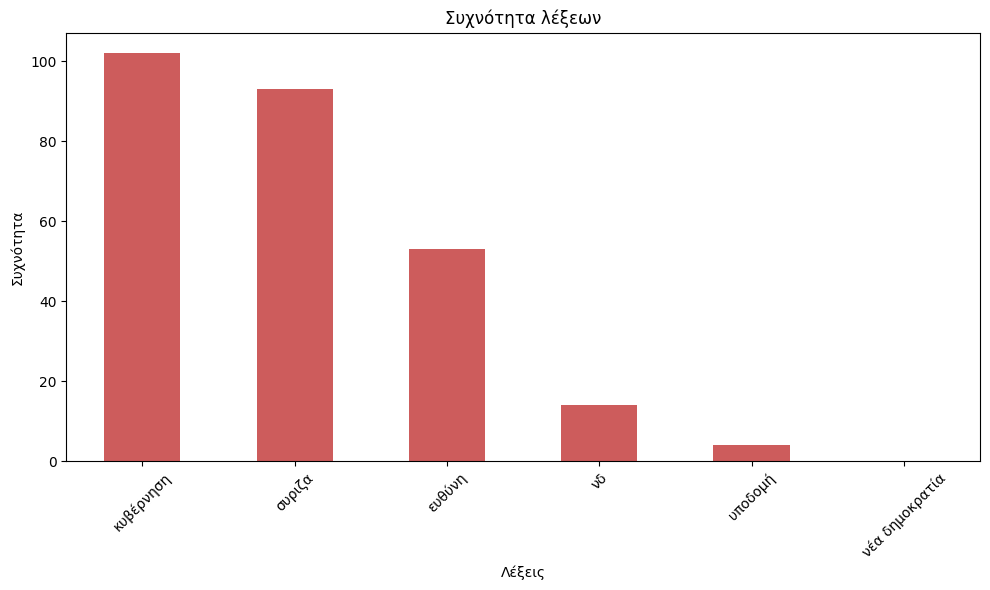

In [65]:
plt.figure(figsize=(10, 6))
results5.sum(axis=0).sort_values(ascending=False).plot(kind='bar', color='indianred')
plt.title('Συχνότητα λέξεων')
plt.xlabel('Λέξεις')
plt.ylabel('Συχνότητα')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
tfidf_vectorizer = TfidfVectorizer(stop_words= list(nlp.Defaults.stop_words), max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(short_avgi['full_text'])

In [68]:
results6 = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
results6.head()

00        10        11        12        15        20  2020      2022  \
0  0.000000  0.053562  0.000000  0.000000  0.000000  0.000000   0.0  0.110533   
1  0.363232  0.000000  0.090808  0.420548  0.198847  0.000000   0.0  0.000000   
2  0.530698  0.000000  0.132675  0.256017  0.048421  0.000000   0.0  0.000000   
3  0.000000  0.000000  0.212096  0.000000  0.000000  0.221315   0.0  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   0.0  0.000000   

       2023   21  ...  χημικά  χθες  χιλιάδες  χρόνια     χτες  χώρα  χώρας  \
0  0.000000  0.0  ...     0.0   0.0       0.0     0.0  0.11886   0.0    0.0   
1  0.085339  0.0  ...     0.0   0.0       0.0     0.0  0.00000   0.0    0.0   
2  0.000000  0.0  ...     0.0   0.0       0.0     0.0  0.00000   0.0    0.0   
3  0.000000  0.0  ...     0.0   0.0       0.0     0.0  0.00000   0.0    0.0   
4  0.000000  0.0  ...     0.0   0.0       0.0     0.0  0.00000   0.0    0.0   

   χώρο       ώρα  ώρες  
0   0.0  0.000000   0.0  
1   0.0  0.000000   0.0  
2   0.0  0.000000   0.0  
3   0.0  0.144525   0.0  
4   0.0  0.000000   0.0  

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [70]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

<Axes: >

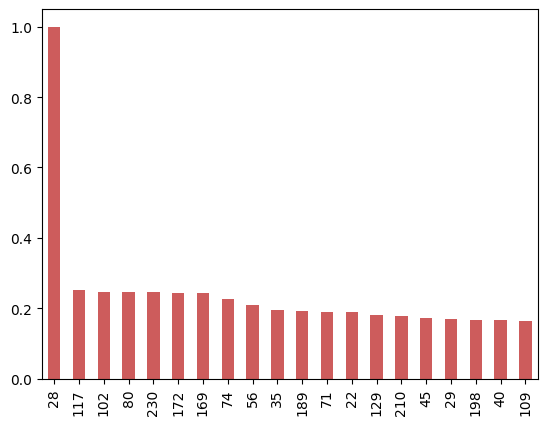

In [71]:
pd.DataFrame(arr).loc[28].sort_values(ascending = False).head(20).plot(kind = 'bar', color='indianred')

In [72]:
short_avgi['full_text'].loc[28]

'Η εθνική τραγωδία με βρήκε στην Κεντρική Ευρώπη. Ήταν σαν να παρακολουθούσα τις εξελίξεις από τα πίσω βαγόνια. Επίσης, εκείνες τις ημέρες έπρεπε να μετακινηθώ μέσω τρένων. Ειρωνικό. Το εισιτήριο είχε ημερομηνία Πέμπτη 2 Μαρτίου και το δρομολόγιο απαιτούσε την αλλαγή τριών αμαξοστοιχιών. Την παραμονή η έκκληση από γονείς ήταν «να κάτσεις στα πίσω βαγόνια», δηλαδή εκεί όπου ήταν ο μικρότερος κίνδυνος στα Τέμπη. Η αυθόρμητη απάντηση: «Μην ανησυχείτε. Στην Ευρώπη δεν βάζουν δύο τρένα στις ίδιες ράγες». Το «πάρε με όταν φτάσεις» που ακολούθησε απέκτησε ξαφνικά άλλο νόημα. Αν καλοσκεφτεί κανείς την παραπάνω φράση, αναδεικνύεται και η τραγικότητα του γεγονότος. Ο πολίτης μπαίνει στη διαδικασία να σκεφτεί πώς δεν θα κινδυνεύσει η ζωή του σε μια μετακίνηση που η ασφάλεια θα έπρεπε να είναι αυτονόητη. Επίσης, δείχνει πόσο μακριά είμαστε από τα ευρωπαϊκά στάνταρ. Στην τελική, πόσο μακριά είμαστε από τα αυτονόητα. Τελικά, μάλλον δεν ήταν άτυχοι οι άνθρωποι που έχασαν τη ζωή τους στα Τέμπη. Όλοι ο

In [73]:
short_avgi['full_text'].loc[169]

'Με εμπειρία 40 χρόνων ο πρώην σταθμάρχης Βόλου Γιώργος Αποστολέρης μίλησε στο MEGA για την εθνική τραγωδία με το σιδηροδρομικό δυστύχημα στα Τέμπη. Όπως αποκάλυψε, εξαιτίας του έντονου φόρτου εργασίας στον σταθμό της Λάρισας, στο παρελθόν στη βάρδια υπήρχαν δύο σταθμάρχες, αλλά και δύο σταθμάρχες στην τηλεδιοίκηση που λειτουργούσε μέχρι πριν από 3-4 χρόνια αλλά όχι πια εξαιτίας της έλλειψης προσωπικού. «Η τηλεδιοίκηση στην Λάρισα σταμάτησε πριν 3-4 χρόνια. Δεν υπάρχει προσωπικό» εξήγησε ο Γ. Αποστολέρης. Την ίδια ώρα, μιλώντας για την εκπαίδευση των σταθμαρχών, ανέφερε χαρακτηριστικά: «Με σαράντα μέρες δεν γίνεσαι σταθμάρχης και μάλιστα, δεν μπορείς να υπηρετήσεις σε ένα τέτοιο σταθμό με τόσο μεγάλο φόρτο εργασίας. Η εμπειρία αποκτάται μέσω εργασίας σε μικρούς σταθμούς και με μεταθέσεις».\xa0'

In [74]:
arr = cosine_similarity(tfidf_matrix_train[0:10], tfidf_matrix_train[0:10])

In [75]:
import seaborn as sns

<Axes: title={'center': 'Βαθμός ομοιότητας των 10 πρώτων άρθρων'}>

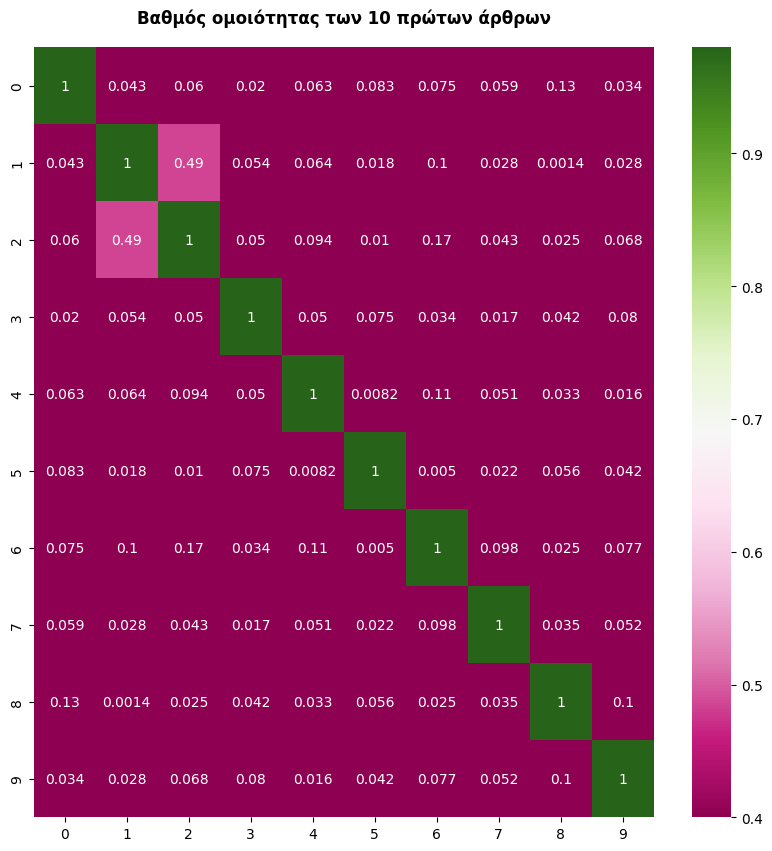

In [78]:
plt.figure(figsize=(10, 10))

plt.title('Βαθμός ομοιότητας των 10 πρώτων άρθρων', y=1.02, fontweight='bold')
sns.heatmap(data=arr, annot=True, vmin=0.40, vmax=0.98, cmap="PiYG")

In [79]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer


In [80]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [81]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [82]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [83]:
len(short_avgi)

267

In [84]:
emolex_df['word'].head(10)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
3                εχω
4               οριο
5              ορμος
6               υδρα
7       αγια τραπεζα
8               αμην
9             απατσι
Name: word, dtype: object

In [85]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [86]:
matrix = vec.fit_transform(short_avgi['full_text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [87]:
wordcount_df.shape

(267, 13161)

In [88]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [89]:
wordcount_df[trust_words].sum(axis=1)

0      10
1       2
2       8
3       0
4       2
       ..
262    12
263     9
264     2
265     0
266     5
Length: 267, dtype: int64

In [90]:
short_avgi['anger'] = wordcount_df[angry_words].sum(axis=1)

short_avgi['positive'] = wordcount_df[positive_words].sum(axis=1)

short_avgi['joy'] = wordcount_df[joy_words].sum(axis=1)

short_avgi['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_avgi['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_avgi['trust'] = wordcount_df[trust_words].sum(axis=1)

short_avgi['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_avgi['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_avgi['negative'] = wordcount_df[negative_words].sum(axis=1)

short_avgi['fear'] = wordcount_df[fear_words].sum(axis=1)

short_avgi['anger_per'] = wordcount_df[angry_words].sum(axis=1)

In [ ]:
short_avgi1 = short_avgi.copy()
short_avgi1.head()

In [95]:
#total_words = wordcount_df.sum(axis=1)

#short_avgi1['anger_per'] = (wordcount_df[angry_words].sum(axis=1) / total_words) * 100
#short_avgi1['positive_per'] = (wordcount_df[positive_words].sum(axis=1) / total_words) * 100
#short_avgi1['joy_per'] = (wordcount_df[joy_words].sum(axis=1) / total_words) * 100
#short_avgi1['disgust_per'] = (wordcount_df[disgust_words].sum(axis=1) / total_words) * 100
#short_avgi1['surprise_per'] = (wordcount_df[surprise_words].sum(axis=1) / total_words) * 100
#short_avgi1['trust_per'] = (wordcount_df[trust_words].sum(axis=1) / total_words) * 100
#short_avgi1['anticipation_per'] = (wordcount_df[anticipation_words].sum(axis=1) / total_words) * 100
#short_avgi1['sadness_per'] = (wordcount_df[sadness_words].sum(axis=1) / total_words) * 100
#short_avgi1['negative_per'] = (wordcount_df[negative_words].sum(axis=1) / total_words) * 100
#short_avgi1['fear_per'] = (wordcount_df[fear_words].sum(axis=1) / total_words) * 100

In [103]:
short_avgi1 = short_avgi1.drop(['anger_per'], axis=1)

In [104]:
short_avgi1.head()

date                                          full_text  \
0 2023-03-07 22:28:00  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...   
1 2023-03-07 21:56:00  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...   
2 2023-03-07 21:35:00  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...   
3 2023-03-07 21:25:00  Σιωπηρή διαμαρτυρία για το σιδηροδρομικό δυστύ...   
4 2023-03-07 21:18:00  Με μία πολύ αιχμηρή ανακοίνωση «απαντάει» το Δ...   

   year  month  day  hour  anger  positive  joy  disgust  surprise  trust  \
0  2023      3    7    22   14.0      15.0  1.0      8.0       8.0   10.0   
1  2023      3    7    21    4.0       4.0  0.0      1.0       1.0    2.0   
2  2023      3    7    21    9.0      10.0  5.0      0.0       4.0    8.0   
3  2023      3    7    21    4.0       1.0  0.0      2.0       2.0    0.0   
4  2023      3    7    21    2.0      10.0  2.0      3.0       3.0    2.0   

   anticipation  sadness  negative  fear  
0          13.0     19.0      26.0  23.0  
1           3.0      5.0       5.0   2.0  
2           6.0      4.0      13.0   4.0  
3           1.0      2.0       6.0   4.0  
4           7.0      7.0       5.0   6.0

In [106]:

short_avgi1['total_words'] = short_avgi1['full_text'].str.split().apply(len)

short_avgi1['anger_per'] = (short_avgi1['anger'] / short_avgi1['total_words']) * 100
short_avgi1['positive_per'] = (short_avgi1['positive'] / short_avgi1['total_words']) * 100
short_avgi1['joy_per'] = (short_avgi1['joy'] / short_avgi1['total_words']) * 100
short_avgi1['disgust_per'] = (short_avgi1['disgust'] / short_avgi1['total_words']) * 100
short_avgi1['surprise_per'] = (short_avgi1['surprise'] / short_avgi1['total_words']) * 100
short_avgi1['trust_per'] = (short_avgi1['trust'] / short_avgi1['total_words']) * 100
short_avgi1['anticipation_per'] = (short_avgi1['anticipation'] / short_avgi1['total_words']) * 100
short_avgi1['sadness_per'] = (short_avgi1['sadness'] / short_avgi1['total_words']) * 100
short_avgi1['negative_per'] = (short_avgi1['negative'] / short_avgi1['total_words']) * 100
short_avgi1['fear_per'] = (short_avgi1['fear'] / short_avgi1['total_words']) * 100

short_avgi1 = short_avgi1.drop('total_words', axis=1)
short_avgi1.head()



date                                          full_text  \
0 2023-03-07 22:28:00  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...   
1 2023-03-07 21:56:00  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...   
2 2023-03-07 21:35:00  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...   
3 2023-03-07 21:25:00  Σιωπηρή διαμαρτυρία για το σιδηροδρομικό δυστύ...   
4 2023-03-07 21:18:00  Με μία πολύ αιχμηρή ανακοίνωση «απαντάει» το Δ...   

   year  month  day  hour  anger  positive  joy  disgust  ...  anger_per  \
0  2023      3    7    22   14.0      15.0  1.0      8.0  ...   2.222222   
1  2023      3    7    21    4.0       4.0  0.0      1.0  ...   1.895735   
2  2023      3    7    21    9.0      10.0  5.0      0.0  ...   1.615799   
3  2023      3    7    21    4.0       1.0  0.0      2.0  ...   4.597701   
4  2023      3    7    21    2.0      10.0  2.0      3.0  ...   0.574713   

   positive_per   joy_per  disgust_per  surprise_per  trust_per  \
0      2.380952  0.158730     1.269841      1.269841   1.587302   
1      1.895735  0.000000     0.473934      0.473934   0.947867   
2      1.795332  0.897666     0.000000      0.718133   1.436266   
3      1.149425  0.000000     2.298851      2.298851   0.000000   
4      2.873563  0.574713     0.862069      0.862069   0.574713   

   anticipation_per  sadness_per  negative_per  fear_per  
0          2.063492     3.015873      4.126984  3.650794  
1          1.421801     2.369668      2.369668  0.947867  
2          1.077199     0.718133      2.333932  0.718133  
3          1.149425     2.298851      6.896552  4.597701  
4          2.011494     2.011494      1.436782  1.724138  

[5 rows x 26 columns]

In [107]:
short_avgi1.keys()

Index(['date', 'full_text', 'year', 'month', 'day', 'hour', 'anger',
       'positive', 'joy', 'disgust', 'surprise', 'trust', 'anticipation',
       'sadness', 'negative', 'fear', 'anger_per', 'positive_per', 'joy_per',
       'disgust_per', 'surprise_per', 'trust_per', 'anticipation_per',
       'sadness_per', 'negative_per', 'fear_per'],
      dtype='object')

In [108]:
short_avgi1.reset_index(inplace=True)
short_avgi1.set_index('date', inplace=True)
short_avgi1

index                                          full_text  \
date                                                                            
2023-03-07 22:28:00      0  Λίγες μέρες μετά την πολύνεκρη τραγωδία στα Τέ...   
2023-03-07 21:56:00      1  Κλείνει κεντρικούς σταθμούς του Μετρό η Αστυνο...   
2023-03-07 21:35:00      2  Μεγαλώνει το κύμα οργής κατά της κυβέρνησης με...   
2023-03-07 21:25:00      3  Σιωπηρή διαμαρτυρία για το σιδηροδρομικό δυστύ...   
2023-03-07 21:18:00      4  Με μία πολύ αιχμηρή ανακοίνωση «απαντάει» το Δ...   
...                    ...                                                ...   
2023-03-01 09:11:00    263  «Σήμερα θρηνούμε τους συμπολίτες μας που χάθηκ...   
2023-03-01 08:49:00    264  Ούτε μία λέξη για το τι προκάλεσε την ανείπωτη...   
2023-03-01 08:32:00    265  Συγκλονισμένος από την ανείπωτη τραγωδία στα Τ...   
2023-03-01 08:18:00    266  Ο δήμαρχος Λάρισας Απόστολος Καλογιάννης μίλησ...   
2023-03-01 08:14:00    267  Πολύ σοβαρές καταγγελίες για την κατάσταση διά...   

                     year  month  day  hour  anger  positive  joy  disgust  \
date                                                                         
2023-03-07 22:28:00  2023      3    7    22   14.0      15.0  1.0      8.0   
2023-03-07 21:56:00  2023      3    7    21    4.0       4.0  0.0      1.0   
2023-03-07 21:35:00  2023      3    7    21    9.0      10.0  5.0      0.0   
2023-03-07 21:25:00  2023      3    7    21    4.0       1.0  0.0      2.0   
2023-03-07 21:18:00  2023      3    7    21    2.0      10.0  2.0      3.0   
...                   ...    ...  ...   ...    ...       ...  ...      ...   
2023-03-01 09:11:00  2023      3    1     9    2.0       8.0  1.0      2.0   
2023-03-01 08:49:00  2023      3    1     8    0.0       2.0  0.0      0.0   
2023-03-01 08:32:00  2023      3    1     8    3.0       1.0  0.0      2.0   
2023-03-01 08:18:00  2023      3    1     8    1.0       3.0  1.0      1.0   
2023-03-01 08:14:00  2023      3    1     8    NaN       NaN  NaN      NaN   

                     ...  anger_per  positive_per   joy_per  disgust_per  \
date                 ...                                                   
2023-03-07 22:28:00  ...   2.222222      2.380952  0.158730     1.269841   
2023-03-07 21:56:00  ...   1.895735      1.895735  0.000000     0.473934   
2023-03-07 21:35:00  ...   1.615799      1.795332  0.897666     0.000000   
2023-03-07 21:25:00  ...   4.597701      1.149425  0.000000     2.298851   
2023-03-07 21:18:00  ...   0.574713      2.873563  0.574713     0.862069   
...                  ...        ...           ...       ...          ...   
2023-03-01 09:11:00  ...   0.332779      1.331115  0.166389     0.332779   
2023-03-01 08:49:00  ...   0.000000      0.851064  0.000000     0.000000   
2023-03-01 08:32:00  ...   3.333333      1.111111  0.000000     2.222222   
2023-03-01 08:18:00  ...   0.497512      1.492537  0.497512     0.497512   
2023-03-01 08:14:00  ...        NaN           NaN       NaN          NaN   

                     surprise_per  trust_per  anticipation_per  sadness_per  \
date                                                                          
2023-03-07 22:28:00      1.269841   1.587302          2.063492     3.015873   
2023-03-07 21:56:00      0.473934   0.947867          1.421801     2.369668   
2023-03-07 21:35:00      0.718133   1.436266          1.077199     0.718133   
2023-03-07 21:25:00      2.298851   0.000000          1.149425     2.298851   
2023-03-07 21:18:00      0.862069   0.574713          2.011494     2.011494   
...                           ...        ...               ...          ...   
2023-03-01 09:11:00      0.665557   1.497504          0.332779     1.164725   
2023-03-01 08:49:00      0.000000   0.851064          0.851064     0.851064   
2023-03-01 08:32:00      4.444444   0.000000          3.333333     6.666667   
2023-03-01 08:18:00      0.497512   2.487562          1.492537     1.492537   
2023-03-01 08:1

<Axes: xlabel='date'>

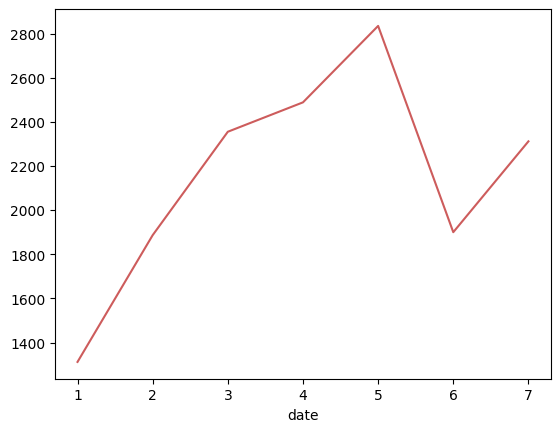

In [110]:
short_avgi1['full_text'].str.len().groupby(by=short_avgi1.index.day).mean().plot(color='indianred')

# Με resample()

<Axes: xlabel='date'>

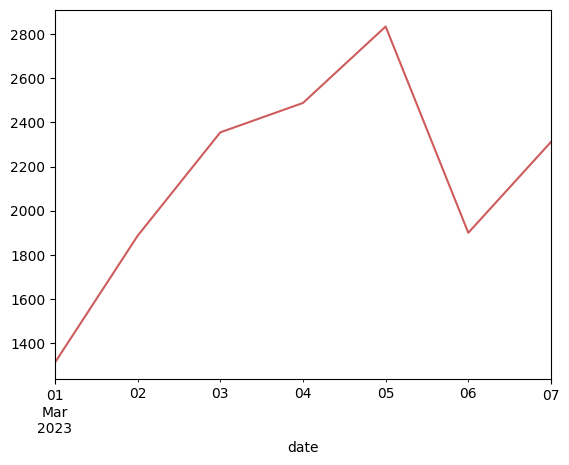

In [111]:
short_avgi1['full_text'].str.len().resample('D').mean().plot(color='indianred')

<Axes: ylabel='date'>

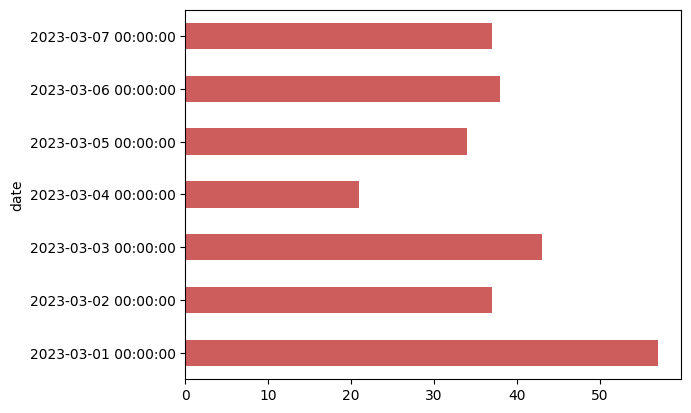

In [113]:
short_avgi1['full_text'].resample('D').count().plot(kind='barh', color='indianred')

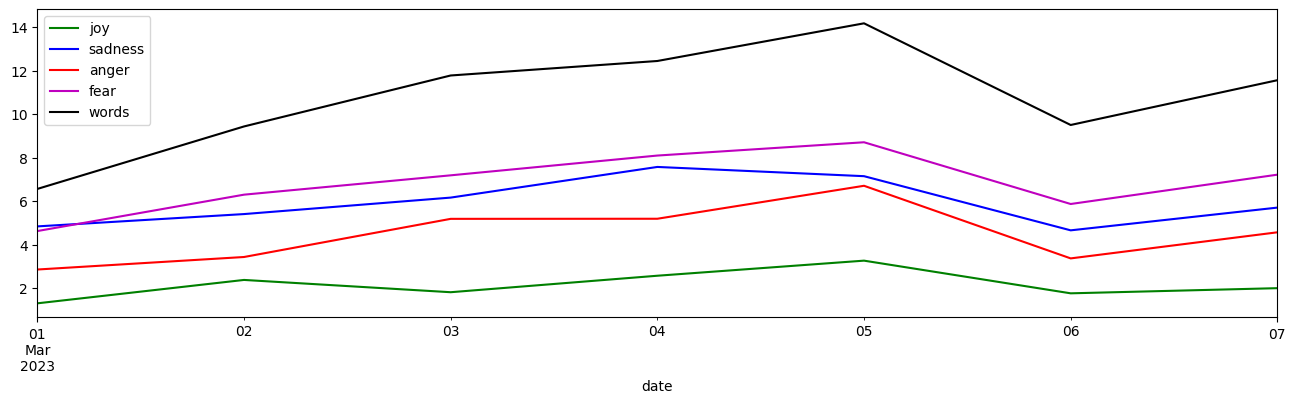

In [114]:
ax = short_avgi1['joy'].resample('D').mean().plot(figsize=(16,4),
                                                          color = 'g', label='joy')
short_avgi1['sadness'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'sadness', color = 'blue')
short_avgi1['anger'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'anger',color = 'r').legend()
short_avgi1['fear'].resample('D').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'fear',color = 'm').legend()
(short_avgi1['full_text'].str.len().resample('D').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

<Axes: xlabel='date'>

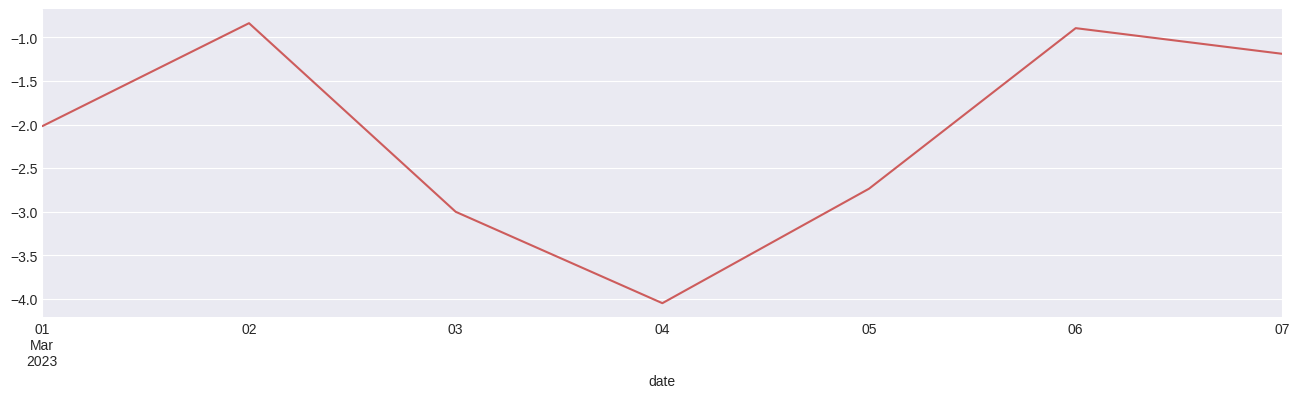

In [120]:
short_avgi1['pos/neg'] = short_avgi1['positive'] - short_avgi1['negative']
short_avgi1['pos/neg'].resample('D').mean().plot(figsize=(16,4), color='indianred')

<Axes: xlabel='date'>

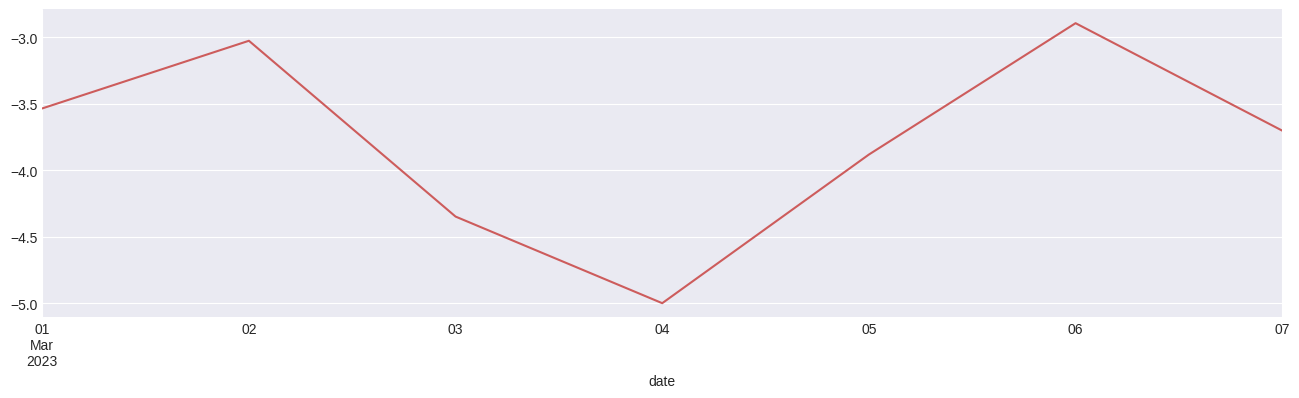

In [118]:
short_avgi1['joy/sad'] = short_avgi1['joy'] - short_avgi1['sadness']
short_avgi1['joy/sad'].resample('D').mean().plot(figsize=(16,4), color='indianred')

<Axes: xlabel='date'>

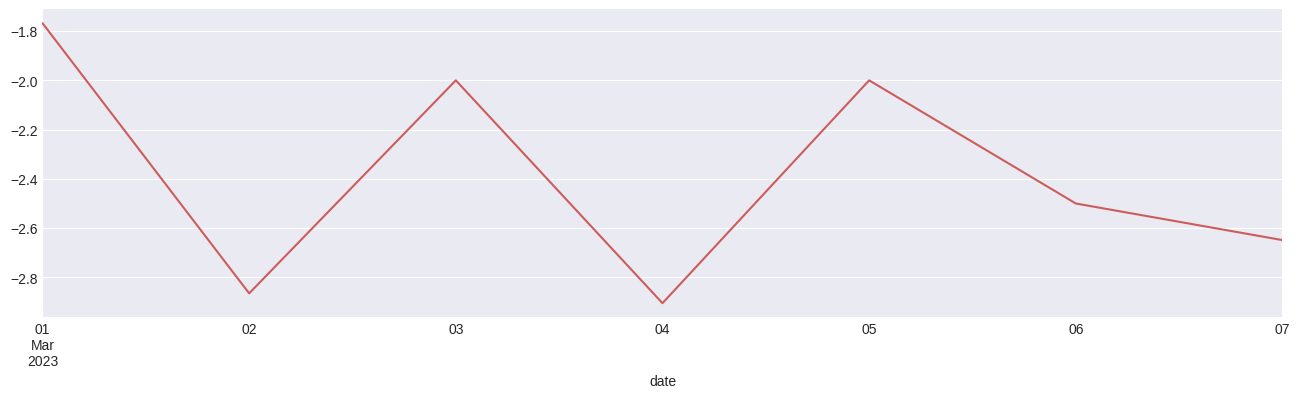

In [129]:
short_avgi1['ang/fear'] = short_avgi1['anger'] - short_avgi1['fear']
short_avgi1['ang/fear'].resample('D').mean().plot(figsize=(16,4), color='indianred')

In [121]:
short_avgi1.keys()

Index(['index', 'full_text', 'year', 'month', 'day', 'hour', 'anger',
       'positive', 'joy', 'disgust', 'surprise', 'trust', 'anticipation',
       'sadness', 'negative', 'fear', 'anger_per', 'positive_per', 'joy_per',
       'disgust_per', 'surprise_per', 'trust_per', 'anticipation_per',
       'sadness_per', 'negative_per', 'fear_per', 'pos/neg', 'joy/sad',
       'ang/fear'],
      dtype='object')

In [117]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

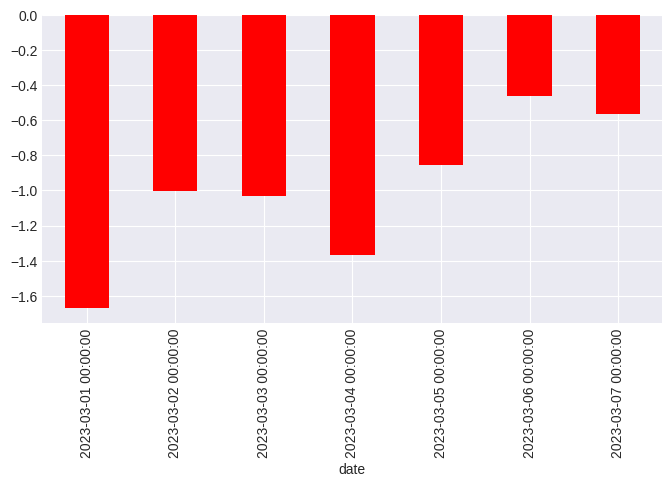

In [122]:
short_avgi1['(-)αρνητικότητα | θετικότητα(+)'] = short_avgi1.positive_per - short_avgi1.negative_per

short_avgi1['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_avgi1['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

<Axes: xlabel='date'>

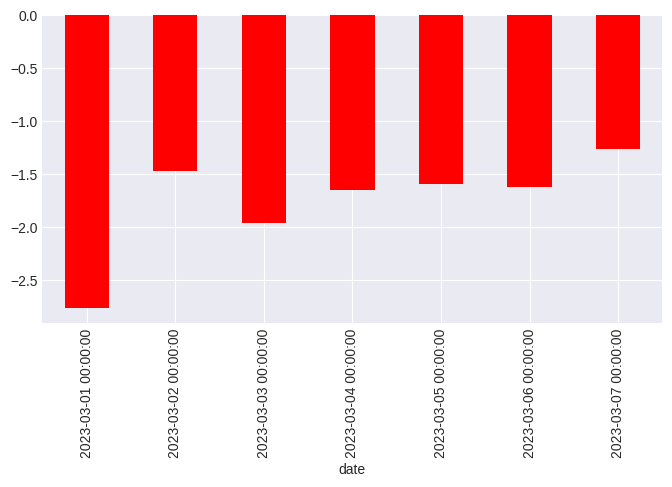

In [126]:
short_avgi1['(-)λύπη | χαρά(+)'] = short_avgi1.joy_per - short_avgi1.sadness_per

short_avgi1['(-)λύπη | χαρά(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_avgi1['(-)λύπη | χαρά(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

<Axes: xlabel='date'>

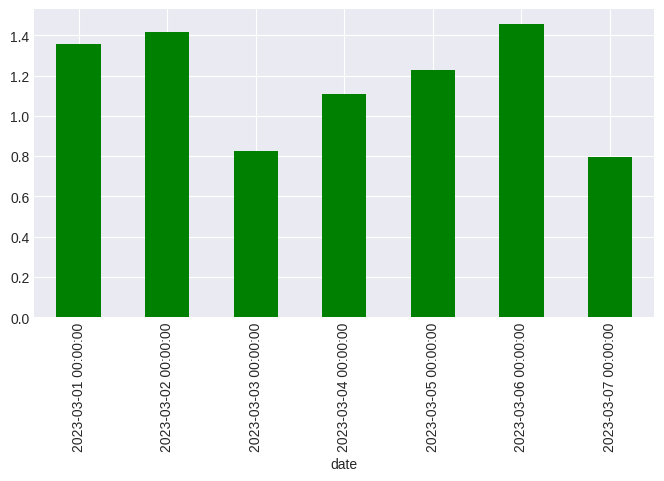

In [127]:
short_avgi1['(-)θυμός | φόβος(+)'] = short_avgi1.fear_per - short_avgi1.anger_per

short_avgi1['(-)θυμός | φόβος(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_avgi1['(-)θυμός | φόβος(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [142]:
short_avgi1[(short_avgi1['(-)αρνητικότητα | θετικότητα(+)'] == short_avgi1['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_avgi1['(-)αρνητικότητα | θετικότητα(+)'] == short_avgi1['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive_per', 'negative_per', '(-)αρνητικότητα | θετικότητα(+)']]

index  positive_per  negative_per  \
date                                                     
2023-03-05 18:13:00     86     48.351648     39.560440   
2023-03-05 11:33:00    101     10.791367     26.618705   

                     (-)αρνητικότητα | θετικότητα(+)  
date                                                  
2023-03-05 18:13:00                         8.791209  
2023-03-05 11:33:00                       -15.827338

In [166]:
avgi_df1.loc[[86,101], ['url','title', 'full_text','date']]

url  \
86   https://www.avgi.gr//koinonia/441355_dehtike-h...   
101  https://www.avgi.gr//parapolitika/441334_o-kar...   

                                                 title  \
86    Κλέλια Ρένεση / Δέχτηκε χημικά ενώ είχε αγκαλ...   
101   Τσουρίδης σε Αυτιά / Ο Καραμανλής παραιτήθηκε...   

                                             full_text                date  
86   Aνηλεής είναι η επίθεση των ΜΑΤ κατά των χιλιά... 2023-03-05 18:13:00  
101  Στη «σέντρα» έβγαλε τον Κώστα Αχ. Καραμανλή ο ... 2023-03-05 11:33:00

In [163]:
short_avgi1.set_index('date')
max_value = short_avgi1['(-)λύπη | χαρά(+)'].max()
min_value = short_avgi1['(-)λύπη | χαρά(+)'].min()
short_avgi1[(short_avgi1['(-)λύπη | χαρά(+)'] == max_value) |
                     (short_avgi1['(-)λύπη | χαρά(+)'] == min_value)][['date','index', 'joy_per', 'sadness_per', '(-)λύπη | χαρά(+)']]




date  index    joy_per  sadness_per  (-)λύπη | χαρά(+)
73  2023-03-06 07:11:00     74  10.843373    36.144578         -25.301205
118 2023-03-04 14:37:00    119   9.090909     2.727273           6.363636

In [165]:
avgi_df1.loc[[74,119], ['url','title', 'full_text','date']]

url  \
74   https://www.avgi.gr//koinonia/441370_nea-24ori...   
119  https://www.avgi.gr//koinonia/441288_mahi-gia-...   

                                                 title  \
74    Τραγωδία στα Τέμπη / Νέα 24ωρη απεργία σήμερα...   
119   Τέμπη / Μάχη για τη ζωή του δίνει 20χρονος πο...   

                                             full_text                date  
74   Ακινητοποιημένα θα μείνουν και σήμερα Δευτέρα ... 2023-03-06 07:11:00  
119  Σε κρίσιμη κατάσταση νοσηλεύεται σε ΜΕΘ ο 20χρ... 2023-03-04 14:37:00

In [167]:
short_avgi1[(short_avgi1['(-)θυμός | φόβος(+)'] == short_avgi1['(-)θυμός | φόβος(+)'].max()) |
                  (short_avgi1['(-)θυμός | φόβος(+)'] == short_avgi1['(-)θυμός | φόβος(+)'].min())
                  ][['date','index', 'fear_per', 'anger_per', '(-)θυμός | φόβος(+)']]

date  index   fear_per  anger_per  (-)θυμός | φόβος(+)
73  2023-03-06 07:11:00     74  46.987952  24.096386            22.891566
159 2023-03-03 12:41:00    160   9.090909  12.500000            -3.409091

In [168]:
avgi_df1.loc[[74,160], ['url','title', 'full_text','date']]

url  \
74   https://www.avgi.gr//koinonia/441370_nea-24ori...   
160  https://www.avgi.gr//politiki/441166_4-erotima...   

                                                 title  \
74    Τραγωδία στα Τέμπη / Νέα 24ωρη απεργία σήμερα...   
160   Πόπη Τσαπανίδου / 4 ερωτήματα που οφείλει να ...   

                                             full_text                date  
74   Ακινητοποιημένα θα μείνουν και σήμερα Δευτέρα ... 2023-03-06 07:11:00  
160  «Κάθε προσπάθεια απόκρυψης και συγκάλυψης της ... 2023-03-03 12:41:00

In [157]:
short_avgi1.keys()

Index(['date', 'index', 'full_text', 'year', 'month', 'day', 'hour', 'anger',
       'positive', 'joy', 'disgust', 'surprise', 'trust', 'anticipation',
       'sadness', 'negative', 'fear', 'anger_per', 'positive_per', 'joy_per',
       'disgust_per', 'surprise_per', 'trust_per', 'anticipation_per',
       'sadness_per', 'negative_per', 'fear_per', 'pos/neg', 'joy/sad',
       'ang/fear', '(-)αρνητικότητα | θετικότητα(+)', '(-)λύπη | χαρά(+)',
       '(-)θυμός | φόβος(+)'],
      dtype='object')

In [154]:
short_avgi1.shape

(267, 33)